In [35]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import matplotlib
%matplotlib inline

In [36]:
def calc_density(s,t):

    rho0 = 1027.51 #reference density in kg/m3

    alpha = 3.733e-5 #Thermal expansion coefficient
    beta  = 7.843e-4 #Salinity contraction coefficient
    tref  = -1.0 #Reference temperature [degC]
    sref  = 34.2 #Reference Salinity [psu]

    return rho0 * (1-alpha*(t-tref)+beta*(s-sref))


Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


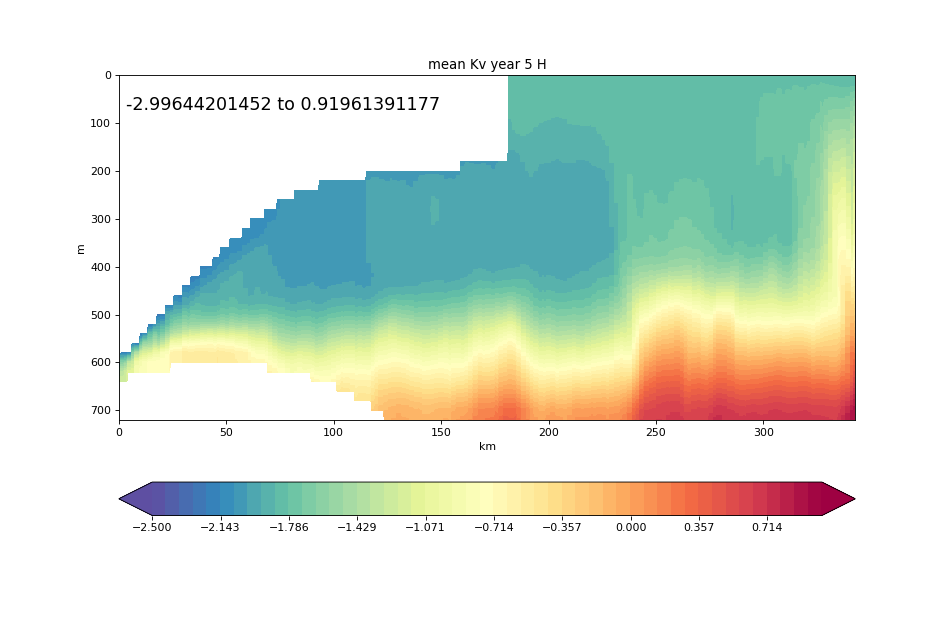

In [38]:
%matplotlib notebook
#basedir = '/work/ollie/orichter/MisomipPlus/'
#meshpath  = basedir+'fesommesh/iceOceanE/1005'

#mesh = pf.fesom_mesh(meshpath, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
#fl = Dataset('/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanH/iceOceanH.1005.oce.diag.nc')

meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
mesh = pf.fesom_mesh(meshpath_z, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/data/oce0com_z_0.10/RG47911.2026.oce.nc')

#salt = fl.variables['salt'][0,:]
data = np.mean(fl.variables['temp'][:,:],0)
#data = np.mean(fl.variables['Kv'][:,:],0)
#data = fl.variables['temp'][0,:]
#data = fl.variables['salt'][0,:]

#data = calc_density(salt,temp)-1000

npoints = 1000
lon_start = mesh.x2.min()
lat_start = np.mean(mesh.y2)
lon_end   = mesh.x2.max()
lat_end   = np.mean(mesh.y2)


#ρ = ρ ref [1 − α lin (T − T ref ) + β lin (S − S ref )]
#data = 1027.51*(1-3.733e-5*(temp+1)+7.843e-4*(salt-34.2))
fig, ax = plt.subplots(1,1, figsize=(12,8))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         #levels = np.linspace(33, 35),
                         levels = np.linspace(-2.5,1),
                         #levels = np.linspace(27.5,27.53,20),
                         #levels = np.linspace(0.0,0.11),
                         cmap=cm.Spectral_r,
                         #cmap=cm.bwr,
                         maxdepth =1000,
                         title = 'mean Kv year 5 H',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
ax.text(0.01, 0.9, str(data.min())+' to '+str(data.max()), transform=ax.transAxes,fontsize=16)
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('')

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds
(28.300045694846084, 34.675247720622615)


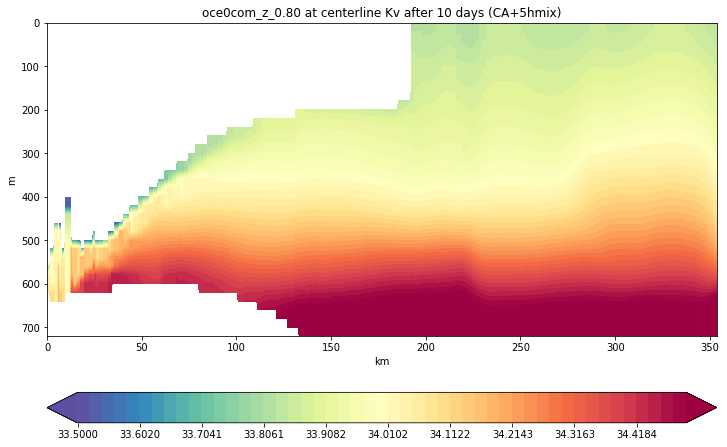

In [27]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1008'

mesh = pf.fesom_mesh(meshpath, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanC/arch/iceOceanC.1008.oce.nc')

#meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
#mesh = pf.fesom_mesh(meshpath_z, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
#fl = Dataset('/work/ollie/orichter/data/oce0com_z_0.80/RG47911.2021.oce.diag.nc')

data = fl.variables['salt'][-1,:]
#temp = fl.variables['temp'][12,:]
#data = fl.variables['Kv'][-1,:]
#data = fl.variables['temp'][0,:]
#data = fl.variables['salt'][0,:]

#data = calc_density(salt,temp)-1000

npoints = 1000
lon_start = mesh.x2.min()
lat_start = np.mean(mesh.y2)
lon_end   = mesh.x2.max()
lat_end   = np.mean(mesh.y2)


#ρ = ρ ref [1 − α lin (T − T ref ) + β lin (S − S ref )]
#data = 1027.51*(1-3.733e-5*(temp+1)+7.843e-4*(salt-34.2))
fig, ax = plt.subplots(1,1, figsize=(12,8))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         levels = np.linspace(33.5, 34.5),
                         #levels = np.linspace(-2.4,1),
                         #levels = np.linspace(27.2,27.9,10),
                         #levels = np.linspace(0.0,0.11),
                         cmap=cm.Spectral_r,
                         #cmap=cm.bwr,
                         maxdepth =1000,
                         title = 'oce0com_z_0.80 at centerline Kv after 10 days (CA+5hmix)',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('')
print(data.min(),data.max())

In [21]:
fl['salt'][-1,:].max()

34.675247720622615

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds
(4.9999999e-05, 0.1)


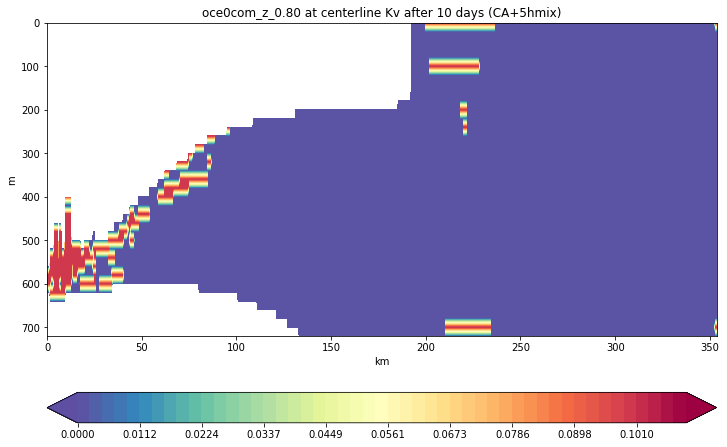

In [14]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1008'

mesh = pf.fesom_mesh(meshpath, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanC/iceOceanC.1008.oce.diag.nc')

#meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
#mesh = pf.fesom_mesh(meshpath_z, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
#fl = Dataset('/work/ollie/orichter/data/oce0com_z_0.80/RG47911.2021.oce.diag.nc')

#salt = fl.variables['salt'][12,:]
#temp = fl.variables['temp'][12,:]
data = fl.variables['Kv'][12,:]
#data = fl.variables['temp'][0,:]
#data = fl.variables['salt'][0,:]

#data = calc_density(salt,temp)-1000

npoints = 1000
lon_start = mesh.x2.min()
lat_start = np.mean(mesh.y2)
lon_end   = mesh.x2.max()
lat_end   = np.mean(mesh.y2)


#ρ = ρ ref [1 − α lin (T − T ref ) + β lin (S − S ref )]
#data = 1027.51*(1-3.733e-5*(temp+1)+7.843e-4*(salt-34.2))
fig, ax = plt.subplots(1,1, figsize=(12,8))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         #levels = np.linspace(33, 35),
                         #levels = np.linspace(-2.4,1),
                         #levels = np.linspace(27.2,27.9,10),
                         levels = np.linspace(0.0,0.11),
                         cmap=cm.Spectral_r,
                         #cmap=cm.bwr,
                         maxdepth =1000,
                         title = 'oce0com_z_0.80 at centerline Kv after 10 days (CA+5hmix)',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('')
print(data.min(),data.max())

In [39]:
salt = fl.variables['salt'][0,:]
temp = fl.variables['temp'][0,:]

data = calc_density(salt,temp)

In [43]:
data-data.mean()

array([ 0.20721042,  0.20721042,  0.20721042, ...,  0.25757767,
        0.27436676,  0.29115584])

In [ ]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1006'

mesh = pf.fesom_mesh(meshpath, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanC/arch/iceOceanC.1006.oce.nc')

#meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
#mesh = pf.fesom_mesh(meshpath_z, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
#fl = Dataset('/work/ollie/orichter/data/oce0com_z_0.80/RG47911.2024.oce.nc')
npoints = 1000
lon_start = mesh.x2.min()
lat_start = np.mean(mesh.y2)
lon_end   = mesh.x2.max()
lat_end   = np.mean(mesh.y2)
#data = np.mean(fl.variables['Kv'][4,:],0)
data = fl.variables['temp'][11,:]
#salt = fl.variables['salt'][2,:]
#ρ = ρ ref [1 − α lin (T − T ref ) + β lin (S − S ref )]
#data = 1027.51*(1-3.733e-5*(temp+1)+7.843e-4*(salt-34.2))
fig, ax = plt.subplots(1,1, figsize=(12,8))
image = pf.plot_transect(data, mesh, 
                         lon_start,
                         lat_start,
                         lon_end,
                         lat_end,
                         npoints=npoints,
                         #levels = np.round(np.linspace(33, 35, 1),2),
                         levels = np.linspace(-2.4,1),
                         #levels = np.linspace(-2,1),
                         cmap=cm.Spectral_r,
                         #cmap=cm.bwr,
                         maxdepth =1200,
                         title = 'monthly mean Potential Temperature at centerline; year: 6 month: 12',
                         ncols=1,
                         figsize=(5,10),
                        ax = ax
                        )
cb = fig.colorbar(image, orientation='horizontal', ax=ax, pad=0.13)
cb.set_label('Temperature in degC')